# 导入数据，并进行基础查看

In [16]:
import pandas as pd
df = pd.read_csv('./data/gapminder.tsv',sep='\t')
print("header: ",df.head(n=2))
print("tp: ",type(df))
print("打印行数和列数: ",df.shape)
print("打印列信息: ", df.columns)
print("每列的类型信息: ", df.dtypes)
print("打印摘要信息:  ")
print(df.info())

header:         country continent  year  lifeExp      pop   gdpPercap
0  Afghanistan      Asia  1952   28.801  8425333  779.445314
1  Afghanistan      Asia  1957   30.332  9240934  820.853030
tp:  <class 'pandas.core.frame.DataFrame'>
打印行数和列数:  (1704, 6)
打印列信息:  Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
每列的类型信息:  country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
打印摘要信息:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
N

# 查看列、行和单元格

In [21]:
# 查看country列
country_series = df['country']
print("tp",type(country_series))
print("head -->")
print(country_series.head(n=3))
print("tail -->")
print(country_series.tail(n=3))

tp <class 'pandas.core.series.Series'>
head -->
0    Afghanistan
1    Afghanistan
2    Afghanistan
Name: country, dtype: object
tail -->
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [24]:
# 查看多列
sub_df = df[['country','continent','year']]
print("tp",type(sub_df))
print("head -->")
print(sub_df.head(n=3))
print("tail -->")
print(sub_df.tail(n=3))

tp <class 'pandas.core.frame.DataFrame'>
head -->
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
tail -->
       country continent  year
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


In [34]:
print("获取第1行数据(从0开始)")
print(df.loc[0])
print(type(df.loc[0]))
print("连续取多行")
print(df.loc[[0,9,99]])
print(type(df.loc[[0,9,99]]))

print("iloc 是通过index来定位的")
print("获取第1行数据(从0开始)")
print(df.iloc[0])
print(type(df.iloc[0]))
print("连续取多行")
print(df.iloc[[0,9,99]])
print(type(df.iloc[[0,9,99]]))
print("iloc支持-1 但loc不支持")
print(df.iloc[-1])

获取第1行数据(从0开始)
country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
连续取多行
        country continent  year  lifeExp       pop   gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333  779.445314
9   Afghanistan      Asia  1997   41.763  22227415  635.341351
99   Bangladesh      Asia  1967   43.453  62821884  721.186086
<class 'pandas.core.frame.DataFrame'>
iloc 是通过index来定位的
获取第1行数据(从0开始)
country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
连续取多行
        country continent  year  lifeExp       pop   gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333  779.445314
9   Afghanistan      Asia  1997   41.763  22227415  635.341351
99   Bangladesh      Asia  1967   43.453  628

## 行列混合

In [39]:
subset = df.loc[:, ['year','pop']]
print(subset.head(n=3))
print("iloc 使用数字，并支持-1")
subset = df.iloc[:,[2,4,-1]] 
print(subset.head(n=3))

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
iloc 使用数字，并支持-1
   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710


In [44]:
print("范围0-5 range(5)")
small_range = list(range(5))
print(small_range)
subset = df.iloc[:, small_range]
print(subset.head(n=2))

范围0-5 range(5)
[0, 1, 2, 3, 4]
       country continent  year  lifeExp      pop
0  Afghanistan      Asia  1952   28.801  8425333
1  Afghanistan      Asia  1957   30.332  9240934


In [48]:
print("范围3-5 range(3, 6) 不包含6")
small_range = list(range(3,6))
print(small_range)
subset = df.iloc[:, small_range]
print(subset.head(2))

范围3-5 range(3, 6) 不包含6
[3, 4, 5]
   lifeExp      pop   gdpPercap
0   28.801  8425333  779.445314
1   30.332  9240934  820.853030


In [50]:
print("范围和步长")
small_range=list(range(0, 6, 2))
print(small_range)
print(df.iloc[:, small_range].head(2))

范围和步长
[0, 2, 4]
       country  year      pop
0  Afghanistan  1952  8425333
1  Afghanistan  1957  9240934


### 切片语法

In [55]:
print("前3列, :3 ")
print(df.iloc[:, :3].head(2))
print("第4到第6列   3:6 (idx是从0开始的)")
print(df.iloc[:, 3:6].head(2))

前3列, :3 
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
第4到第6列   3:6
   lifeExp      pop   gdpPercap
0   28.801  8425333  779.445314
1   30.332  9240934  820.853030


In [59]:
print("第1、3、5列 0:6:2 (步长为2)")
subset = df.iloc[:, 0:6:2]
print(subset.head(2))

第1、3、5列 0:6:2 (步长为2)
       country  year      pop
0  Afghanistan  1952  8425333
1  Afghanistan  1957  9240934


### 多行多列

In [62]:
print("多行多列")
print(df.iloc[[0,9,99],[0,3,5]])
print("切片语法")
print(df.iloc[0:6:2,0:6:2])

多行多列
        country  lifeExp   gdpPercap
0   Afghanistan   28.801  779.445314
9   Afghanistan   41.763  635.341351
99   Bangladesh   43.453  721.186086
切片语法
       country  year       pop
0  Afghanistan  1952   8425333
2  Afghanistan  1962  10267083
4  Afghanistan  1972  13079460


### groupby

In [66]:
subset = df.groupby('year')['lifeExp'].mean()
print(subset)
print(type(subset))
print(type(df.groupby('year')))
print(type(df.groupby('year')['lifeExp']))

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [70]:
multi_group = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
multi_group.head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [72]:
flat = multi_group.reset_index()
print(flat.head(15))

    year continent    lifeExp     gdpPercap
0   1952    Africa  39.135500   1252.572466
1   1952  Americas  53.279840   4079.062552
2   1952      Asia  46.314394   5195.484004
3   1952    Europe  64.408500   5661.057435
4   1952   Oceania  69.255000  10298.085650
5   1957    Africa  41.266346   1385.236062
6   1957  Americas  55.960280   4616.043733
7   1957      Asia  49.318544   5787.732940
8   1957    Europe  66.703067   6963.012816
9   1957   Oceania  70.295000  11598.522455
10  1962    Africa  43.319442   1598.078825
11  1962  Americas  58.398760   4901.541870
12  1962      Asia  51.563223   5729.369625
13  1962    Europe  68.539233   8365.486814
14  1962   Oceania  71.085000  12696.452430


### 统计频次

In [82]:
print(df.groupby('continent')['country'].nunique())
print("-----")
print(df.groupby('continent')['country'].value_counts())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64
-----
continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64


In [83]:
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


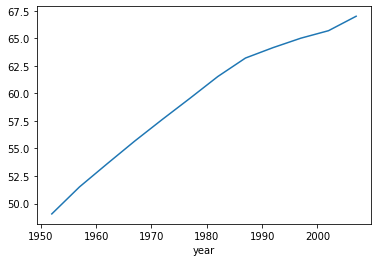

In [84]:
df.groupby('year')['lifeExp'].mean().plot()